# Basic usage case of `augmented OASIS`

To use this notebook, open it as a Jupyter Notebook in the browser. Use Python 2 or 3 with the following packages:
numpy, scipy, pandas, matplotlib, keras, oasis

You need to get oasis directly from the GitHub [repository](https://github.com/j-friedrich/OASIS/) and make sure to add it to your `PYTHONPATH`.

For more detailed documentation and instructions on how to apply the code to your own calcium imaging data, please have a look at the [main repository](https://github.com/j-friedrich/OASIS/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import utils

%matplotlib inline

Using TensorFlow backend.


## Load the first spikefinder dataset

In [2]:
dataset = 1
F, trueS = utils.load_data(dataset)

## RUN OASIS to infer spikes on all neurons in the data array F

Here we run OASIS with fixed parameters that are know due to the presence of ground truth data. 
Specifically, we provide (as default values for the arguments of `runOASIS`) six parameters: the percentile value and window length to estimate the baseline using a running percentile, the two AR coefficients, and the slope and offset of a linear function that determines the sparsity parameter λ as function of the noise.

For best results these parameters should be adjusted accordingly for the dataset at hand. For arbitrary calcium data the parameters can also be estimated from the data. Look at the [Demo in the main repository](https://github.com/j-friedrich/OASIS/blob/master/examples/Demo.ipynb) for more information.

In [3]:
oasisS = utils.runOASIS(F)

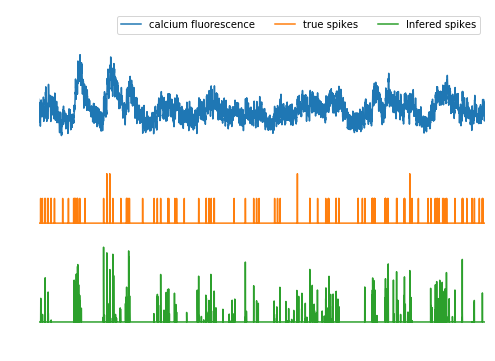

In [4]:
# Plot an example neuron
neuron_index = 3
utils.plot_inference(F, trueS, oasisS, neuron_index)
_ = plt.xlim([15000, 25000])

## POSTPROCESS by convolving result with some kernel

Running OASIS with the known parameters yields directly an estimate of the neural
activity shown above. This estimate was already good for datasets 6-10, but noticeably improved for the
first 5 datasets by convolving it with some kernel k and adding some basline as postprocessing step.

In the presence of training data, the kernel and baseline can be learned in a supervised manner. Otherwise a simple user-specified kernel such as a Gaussian could be provided -- or the postprocessing be skipped entirely.

In [5]:
w, b = utils.learn_params(oasisS, trueS)

utils.py:96: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(1, 30, padding="same", activation="relu", weights=[array([[[...)`
  weights=[w[:, None, None], np.array([0])])(F)
utils.py:97: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  decoder = keras.models.Model(input=F, output=s)


In [6]:
S = utils.postprocess(oasisS, w, b)

Correlation with ground truth:  0.499250189277


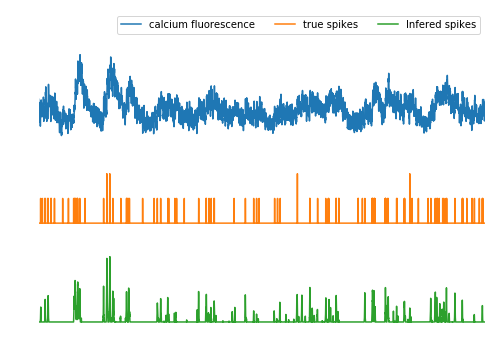

In [7]:
# Plot an example neuron
neuron_index = 3
utils.plot_inference(F, trueS, S, neuron_index)
_ = plt.xlim([15000, 25000])
print('Correlation with ground truth: ', np.median(utils.score(S, trueS)))